In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
temp = pd.read_csv('DataTemp/Data01mean/Tempdatamean.csv',index_col = 1 , parse_dates=True)

In [3]:
temp.head(5)

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


In [4]:
temp.loc[temp[' Q_TG'] == 9 ]

,SOUID,TG,Q_TG
DATE,,,
1945-04-25,127488,-9999,9
1945-04-26,127488,-9999,9
1945-04-27,127488,-9999,9
1945-04-28,127488,-9999,9
1945-04-29,127488,-9999,9
...,...,...,...
1945-11-01,127488,-9999,9
1945-11-02,127488,-9999,9
1945-11-03,127488,-9999,9


In [5]:
temp.loc[temp[' Q_TG'] == 1 ]

,SOUID,TG,Q_TG
DATE,,,
1947-01-21,127488,-27,1


In [6]:
temp['1947-01-15':'1947-01-25']

,SOUID,TG,Q_TG
DATE,,,
1947-01-15,128124,58,0
1947-01-16,128124,24,0
1947-01-17,128124,45,0
1947-01-18,128124,38,0
1947-01-19,128124,10,0
1947-01-20,128124,-13,0
1947-01-21,127488,-27,1
1947-01-22,128124,-28,0
1947-01-23,128124,-38,0


In [7]:
temp.columns

Index([' SOUID', '   TG', ' Q_TG'], dtype='object')

In [8]:
temp.rename(columns={'   TG' : 'meantemperature'}, inplace=True)

In [9]:
temp.rename_axis('Date',inplace=True)

In [10]:
temp.index[1400:1600]

DatetimeIndex(['1879-11-01', '1879-11-02', '1879-11-03', '1879-11-04',
               '1879-11-05', '1879-11-06', '1879-11-07', '1879-11-08',
               '1879-11-09', '1879-11-10',
               ...
               '1880-05-09', '1880-05-10', '1880-05-11', '1880-05-12',
               '1880-05-13', '1880-05-14', '1880-05-15', '1880-05-16',
               '1880-05-17', '1880-05-18'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)

In [11]:
temp['meantemperature'] = temp['meantemperature'] *0.1

In [12]:
temp.loc[temp['meantemperature'] < -100 ]

,SOUID,meantemperature,Q_TG
Date,,,
1945-04-25,127488,-999.9,9
1945-04-26,127488,-999.9,9
1945-04-27,127488,-999.9,9
1945-04-28,127488,-999.9,9
1945-04-29,127488,-999.9,9
...,...,...,...
1945-11-01,127488,-999.9,9
1945-11-02,127488,-999.9,9
1945-11-03,127488,-999.9,9


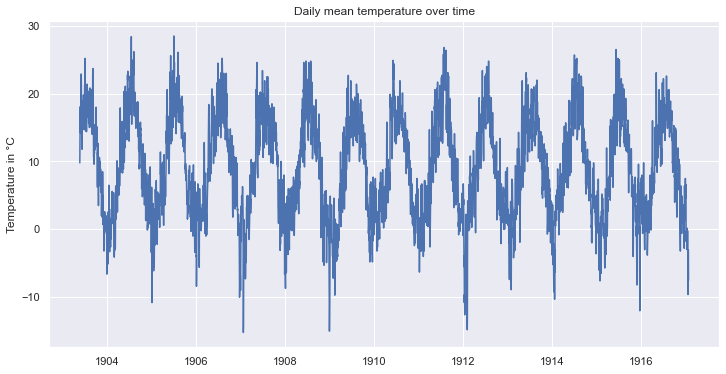

In [13]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(temp.index[10000:15000],temp['meantemperature'][10000:15000])

In [14]:
wtemp = temp.drop([' SOUID',' Q_TG'],axis=1)
wtemp

,meantemperature
Date,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-02-24,5.9
2022-02-25,4.4
2022-02-26,4.1


In [15]:
wtemp = wtemp.loc[wtemp['meantemperature'] > -100]

In [16]:
wtemp

,meantemperature
Date,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-02-24,5.9
2022-02-25,4.4
2022-02-26,4.1


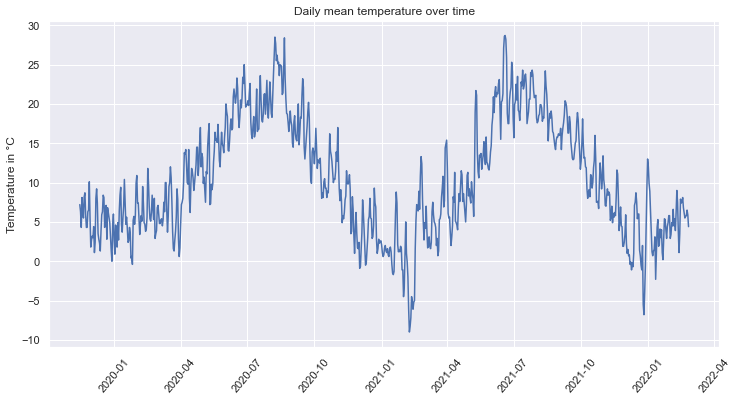

In [17]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wtemp['2019-11-15':'2022-02-25'])

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)

y_av = movingaverage(wtemp['meantemperature'], 30)


plt.plot(wtemp.index[10000:15000],y_av[10000:15000])


In [18]:
type(wtemp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [19]:
wtemp.index.isocalendar().week

Date
1876-01-01    52
1876-01-02    52
1876-01-03     1
1876-01-04     1
1876-01-05     1
              ..
2022-02-24     8
2022-02-25     8
2022-02-26     8
2022-02-27     8
2022-02-28     9
Name: week, Length: 53190, dtype: UInt32

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
wtemp['timestep'] = range(len(wtemp))

C:\Users\aoe\AppData\Local\Temp/ipykernel_11048/2948537851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['timestep'] = range(len(wtemp))


In [22]:
testsplit = wtemp[-7:]
testsplit

,meantemperature,timestep
Date,,
2022-02-22,5.8,53183
2022-02-23,6.5,53184
2022-02-24,5.9,53185
2022-02-25,4.4,53186
2022-02-26,4.1,53187
2022-02-27,0.5,53188
2022-02-28,1.7,53189


In [23]:
traintemp = wtemp[:-7]
traintemp.tail(4)

,meantemperature,timestep
Date,,
2022-02-18,6.8,53179
2022-02-19,6.1,53180
2022-02-20,5.5,53181
2022-02-21,5.7,53182


In [24]:
X = traintemp[['timestep']] # matrix (or DataFrame)
y = traintemp['meantemperature'] # vector (or Series)

In [25]:
m = LinearRegression()

In [26]:
m.fit(X, y)

LinearRegression()

In [27]:
traintemp['trend'] = m.predict(X)

C:\Users\aoe\AppData\Local\Temp/ipykernel_11048/207190163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintemp['trend'] = m.predict(X)


<AxesSubplot:xlabel='Date'>

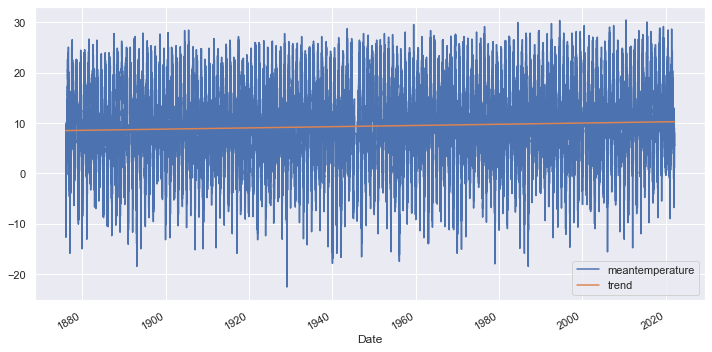

In [28]:
traintemp[['meantemperature', 'trend']].plot()

C:\Users\aoe\AppData\Local\Temp/ipykernel_11048/3311302461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintemp['wo_trend'] = traintemp['meantemperature'] - traintemp['trend']


<AxesSubplot:xlabel='Date'>

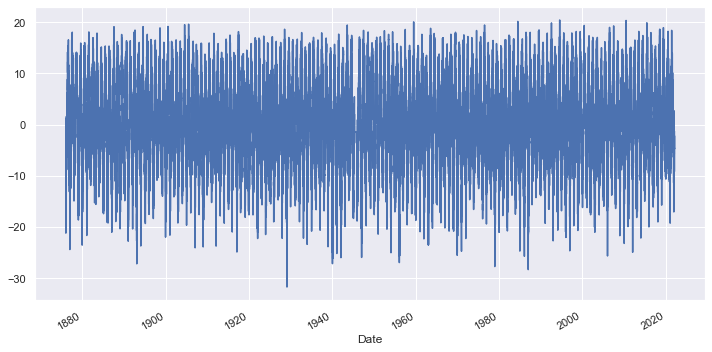

In [29]:
traintemp['wo_trend'] = traintemp['meantemperature'] - traintemp['trend']

traintemp['wo_trend'].plot()

In [30]:
# One-Hot-Encoding the week
seasonal_dummies1 = pd.get_dummies(wtemp.index.isocalendar().week,
                                  prefix='week',
                                  drop_first=True).set_index(wtemp.index)

In [31]:
# join the dummies with the data frame
traintemp = traintemp.join(seasonal_dummies1)

In [32]:
traintemp.head()

,meantemperature,timestep,trend,wo_trend,week_2,week_3,week_4,week_5,week_6,week_7,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.510250,-6.310250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1876-01-02,2.5,1,8.510283,-6.010283,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1876-01-03,0.3,2,8.510316,-8.210316,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,3,8.510350,-14.310350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,4,8.510383,-18.310383,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Define X and y
X = traintemp.drop(columns=['meantemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

# y is already defined (meantemperarture)

In [34]:
m.fit(X, y)
# Create a model with trend and seasonality
traintemp['trend + seasonal'] = m.predict(X)
traintemp.head()

,meantemperature,timestep,trend,wo_trend,week_2,week_3,week_4,week_5,week_6,week_7,...,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,trend + seasonal
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.510250,-6.310250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.056144
1876-01-02,2.5,1,8.510283,-6.010283,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.056111
1876-01-03,0.3,2,8.510316,-8.210316,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.740725
1876-01-04,-5.8,3,8.510350,-14.310350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.740691
1876-01-05,-9.8,4,8.510383,-18.310383,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.740658


<AxesSubplot:xlabel='Date'>

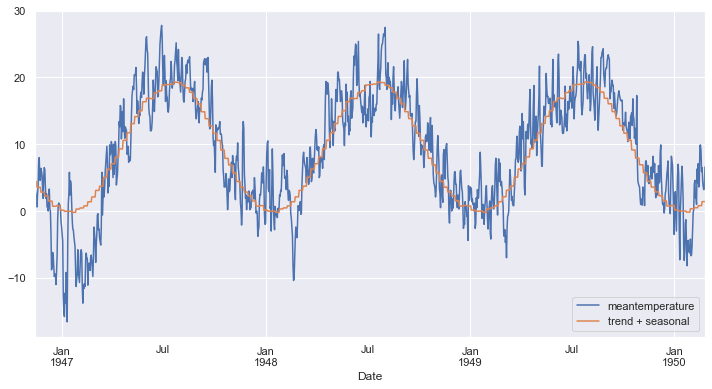

In [35]:
traintemp['1946-11-15':'1950-02-25'][['meantemperature', 'trend + seasonal']].plot()

In [36]:
traintemp['remainder'] = traintemp['meantemperature'] - traintemp['trend + seasonal']

<AxesSubplot:xlabel='Date'>

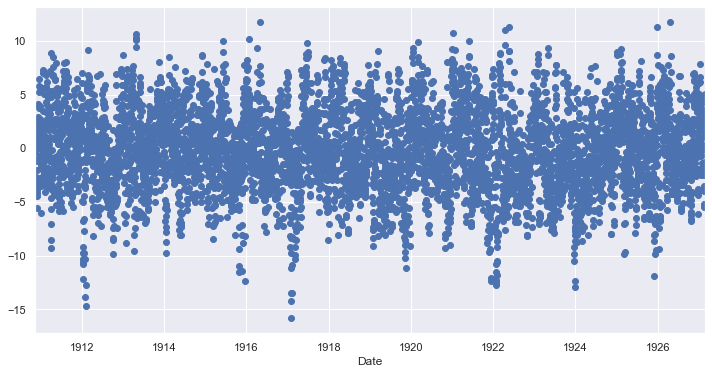

In [37]:
traintemp['1910-11-15':'1927-02-25']['remainder'].plot(style='o')

In [38]:
traintemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28',
       'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34',
       'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40',
       'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46',
       'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52',
       'week_53', 'trend + seasonal', 'remainder'],
      dtype='object')

In [39]:
rtemp = traintemp.drop(columns=['meantemperature', 'timestep', 'trend', 'wo_trend', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28',
       'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34',
       'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40',
       'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46',
       'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52',
       'week_53', 'trend + seasonal'])
rtemp.head(3)

,remainder
Date,
1876-01-01,2.256144
1876-01-02,2.556111
1876-01-03,1.040725


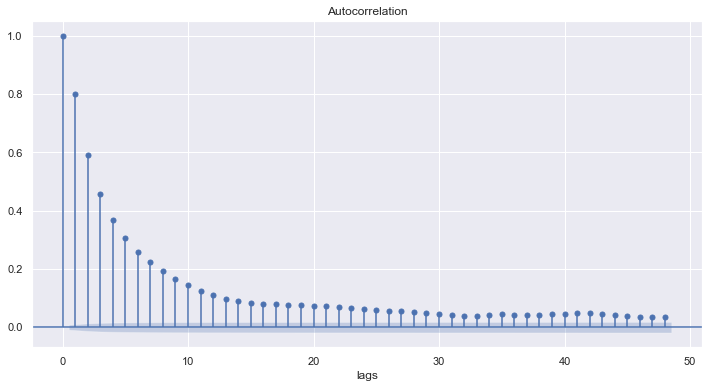

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rtemp['remainder'])
plt.xlabel('lags');

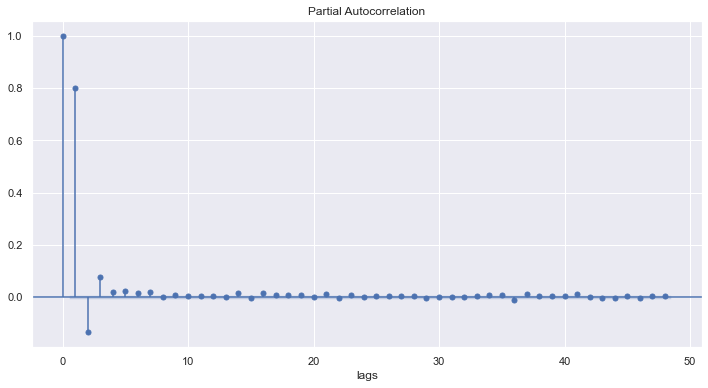

In [41]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(rtemp['remainder'])
plt.xlabel('lags');

In [42]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(rtemp['remainder'], maxlag = 12)
selected_order.ar_lags

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


array([1, 2, 3, 4, 5, 6, 7])

In [43]:
traintemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28',
       'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34',
       'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40',
       'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46',
       'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52',
       'week_53', 'trend + seasonal', 'remainder'],
      dtype='object')

In [44]:
Ntemp = traintemp.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [45]:
Ntemp['lag1'] = Ntemp['remainder'].shift(1)
Ntemp['lag2'] = Ntemp['remainder'].shift(2)
Ntemp['lag3'] = Ntemp['remainder'].shift(3)
Ntemp['lag4'] = Ntemp['remainder'].shift(4)
Ntemp['lag5'] = Ntemp['remainder'].shift(5)
Ntemp['lag6'] = Ntemp['remainder'].shift(6)
Ntemp['lag7'] = Ntemp['remainder'].shift(7)

In [46]:
Ntemp.head(5)

,meantemperature,timestep,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,...,week_52,week_53,remainder,lag1,lag2,lag3,lag4,lag5,lag6,lag7
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,...,1,0,2.256144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-02,2.5,1,0,0,0,0,0,0,0,0,...,1,0,2.556111,2.256144,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-03,0.3,2,0,0,0,0,0,0,0,0,...,0,0,1.040725,2.556111,2.256144,NaN,NaN,NaN,NaN,NaN
1876-01-04,-5.8,3,0,0,0,0,0,0,0,0,...,0,0,-5.059309,1.040725,2.556111,2.256144,NaN,NaN,NaN,NaN
1876-01-05,-9.8,4,0,0,0,0,0,0,0,0,...,0,0,-9.059342,-5.059309,1.040725,2.556111,2.256144,NaN,NaN,NaN


In [47]:
Ntemp.dropna(inplace = True)

In [48]:
X = Ntemp.drop(columns=['meantemperature','remainder']) # matrix (or DataFrame)
y = Ntemp['meantemperature'] # vector (or Series)

In [49]:
mN = LinearRegression()
mN.fit(X, y)

LinearRegression()

In [50]:
Ntemp['remainder_predict'] = mN.predict(X)

In [51]:
Ntemp.rename(columns={'remainder_predict' : 'full_predict'}, inplace=True)

<AxesSubplot:xlabel='Date'>

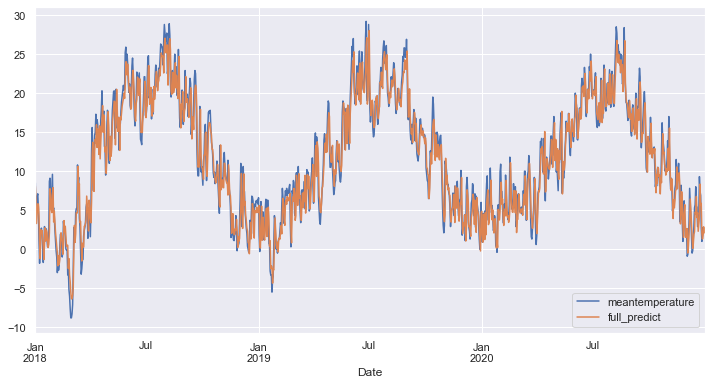

In [52]:
Ntemp['2018-01-01':'2020-12-31'][['meantemperature', 'full_predict']].plot()

In [53]:
testsplit

,meantemperature,timestep
Date,,
2022-02-22,5.8,53183
2022-02-23,6.5,53184
2022-02-24,5.9,53185
2022-02-25,4.4,53186
2022-02-26,4.1,53187
2022-02-27,0.5,53188
2022-02-28,1.7,53189
